# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

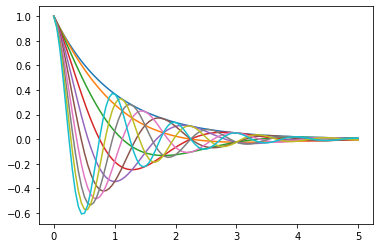

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, pi

fig, ax = plt.subplots()
x = np.linspace(0, 5, 100)

for i in np.linspace(0, 2, 10):
    y = np.cos(pi * i * x) * np.exp(-x)
    ax.plot(x, y)

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

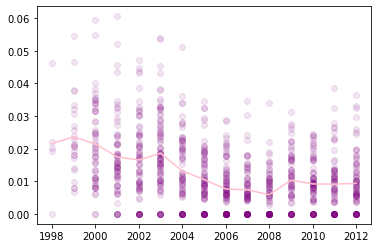

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# read df
df = pd.read_csv('data/tennis.csv')
# add ratio to show
df['ratio'] = df['player1 double faults'] / df['player1 total points total']

# get the trend
per_year = df.groupby(['year']).mean().reset_index()
# start the stuff
fig, ax = plt.subplots()
# plot all the stuff
ax.scatter(df['year'], df['ratio'], alpha=0.1, color="purple")
ax.plot(per_year['year'], per_year['ratio'], color="pink")
# shot all the plotted stuff
plt.show()

# best comments ever!

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [91]:
import datetime as dt
from pandas_datareader import data

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
ticker = ticker.reset_index()


<BarContainer object of 13 artists>

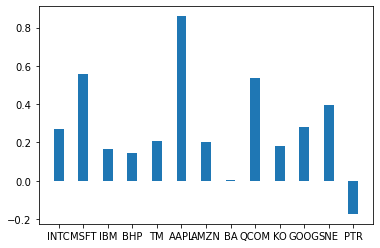

In [102]:
y = [(ticker[tick].iloc[-1] / ticker[tick].iloc[0]) - 1 for tick in ticker_list]

plt.bar(ticker_list.keys(), y,width = 0.4) 

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [157]:
import datetime as dt
from pandas_datareader import data

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

indeces_prices = read_data(indices_list,start=dt.datetime(1928, 1, 2))
indeces_prices = indeces_prices.reset_index()




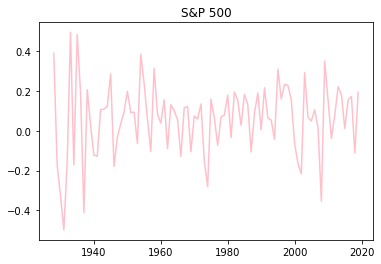

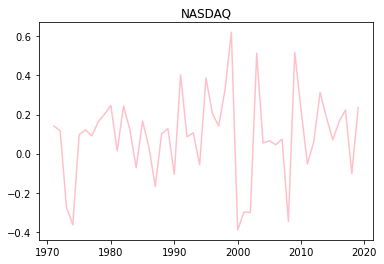

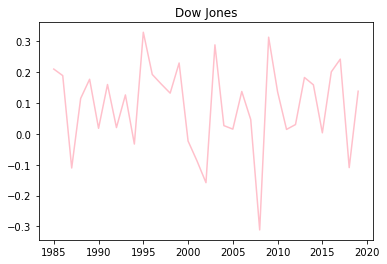

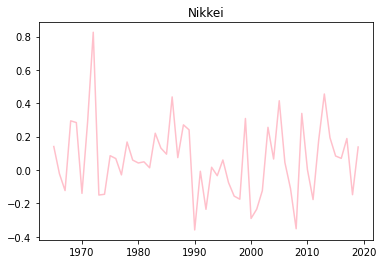

In [192]:
def print_graphs():
    def get_perc_change(start, end):
        after_start_date = df["date"] >= start_date 
        before_end_date = df["date"] <= end_date

for index in indices_list.keys():
    index_df = indeces_prices[[index, 'Date']].dropna()
    min_year = index_df['Date'].iloc[0]
    max_year = index_df['Date'].iloc[-1]
    x = [i for i in range(min_year.year, max_year.year + 1)]
    y = []
    for year in x:
        sub_df = index_df.loc[(index_df["Date"] >= dt.datetime(year, 2, 1)) & (index_df["Date"] <= dt.datetime(year, 12, 31))]
        y.append((sub_df[index].iloc[-1] / sub_df[index].iloc[0]) - 1)
    fig, ax = plt.subplots()
    plt.title(indices_list[index]) 
    ax.plot(x, y, color="pink")


# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

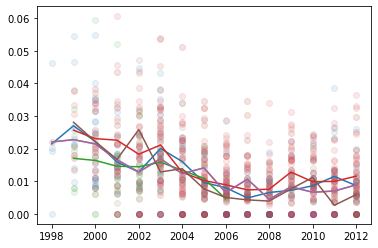

In [207]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# read df
df = pd.read_csv('data/tennis.csv')
df['ratio'] = df['player1 double faults'] / df['player1 total points total']

for surface in ['Indoor: Hard', 'Outdoor: Clay', 'Indoor: Carpet', 'Outdoor: Hard', 'Outdoor: Clay', 'Outdoor: Grass']:
    temp_df = df.loc[df['surface'] == surface]
    per_year = temp_df.groupby(['year']).mean().reset_index()
    ax.scatter(temp_df['year'], temp_df['ratio'], alpha=0.1, )
    ax.plot(per_year['year'], per_year['ratio'])

# shot all the plotted stuff
plt.show()